# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Import Data

In [3]:
loan_data_backup = pd.read_csv('loan_data_sample_before_2018.csv')

In [4]:
loan_data = loan_data_backup.copy()

### Preprocessing few discrete variables

#### Methodology Explanation:

 1. **Why use Weight of Evidence (WoE)**?
   - WoE is a transformation technique often used in credit risk modeling, especially in logistic regression models.
    - The transformation takes a categorical variable, such as 'grade', and converts it into a continuous variable
      that captures the relationship between the category and the target (good/bad outcome).
    - This makes the variable suitable for logistic regression, where continuous inputs are often preferred.

 2. **Why WoE is better than dummy variables in some cases:**
    - Interpretability: WoE provides a log-odds ratio that is easy to interpret in terms of how "risky" a category is compared to others.
    - Single Continuous Feature: Instead of creating multiple dummy variables for each category, WoE converts a categorical variable into a single continuous feature. This reduces model complexity and helps avoid issues like multicollinearity.
    - Stability: WoE transformation ensures better model stability, especially when some categories have very few observations, which can lead to noise in dummy variables.

 3. **How WoE is calculated**:
    - For each category in the variable 'grade', we calculate the proportion of "goods" (those who did not default) and "bads" (those who defaulted).
    - WoE is then the log ratio of the proportion of goods to the proportion of bads for each category.
    - Categories with a higher proportion of goods relative to bads will have positive WoE values, while those with more bads will have negative values.
    - We also calculate the Information Value (IV), which is a measure of how predictive the variable is for the target. Higher IV means the variable is more predictive.

 4. **Next Steps**:
    - The transformed variable ('grade_woe') can now be used directly in the logistic regression model.
    - You can repeat the process for other categorical variables if needed.

In [7]:
loan_data.info(max_cols=250)
# Displays all column names.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390077 entries, 0 to 390076
Data columns (total 103 columns):
 #    Column                          Non-Null Count   Dtype  
---   ------                          --------------   -----  
 0    id                              390077 non-null  int64  
 1    loan_amnt                       390077 non-null  float64
 2    funded_amnt                     390077 non-null  float64
 3    funded_amnt_inv                 390077 non-null  float64
 4    term                            390077 non-null  object 
 5    int_rate                        390077 non-null  float64
 6    installment                     390077 non-null  float64
 7    grade                           390077 non-null  object 
 8    sub_grade                       390077 non-null  object 
 9    emp_length                      366823 non-null  object 
 10   home_ownership                  390077 non-null  object 
 11   annual_inc                      390076 non-null  float64
 12   

### Check for missing values and clean

In [9]:
pd.set_option('display.max_rows', None)
null_counts = loan_data.isna().sum().reset_index()
null_counts.columns = ['Column', 'NullCount']
null_counts.loc[0:300, :]
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe.

,Column,NullCount
0,id,0
1,loan_amnt,0
2,funded_amnt,0
3,funded_amnt_inv,0
4,term,0
5,int_rate,0
6,installment,0
7,grade,0
8,sub_grade,0
9,emp_length,23254


In [10]:
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
loan_data['total_rev_hi_lim'] = loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt']).infer_objects()
# We fill the missing values with the values of another variable.

In [11]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [12]:
loan_data['annual_inc'] = loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean()).infer_objects()
loan_data['annual_inc'] = loan_data['annual_inc']
loan_data['annual_inc'].isnull().sum()

0

In [13]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line_date'])
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d_date'])
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line_date'].fillna(loan_data['earliest_cr_line_date'].min())
loan_data['issue_d_date'] = loan_data['issue_d_date'].fillna(loan_data['issue_d_date'].min())                                           

In [14]:
def cat_num_features(df):
    
    '''
        Utility Function to get the names of Categorical Features and 
        Numerical Features of the given Dataset.
    '''
    
    catf = []
    numf = []
    
    # Given Categorical Features 
    catf = ['id', 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'earliest_cr_line_date', 'issue_d_date']


    # Updating the Categorical Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in catf if feature in df.columns.values]
    numf = [feature for feature in df.columns.values if feature not in catf and feature != 'good_bad']
    
    return (catf, numf)  

In [15]:
catf, numf = cat_num_features(loan_data)
# Fill NaN values with 0 and infer object types
for column in numf:
    loan_data[column] = loan_data[column].fillna(0)

In [16]:
pd.set_option('display.max_rows', None)
null_counts = loan_data.isna().sum().reset_index()
null_counts.columns = ['Column', 'NullCount']
null_counts.loc[0:300, :]
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe.

,Column,NullCount
0,id,0
1,loan_amnt,0
2,funded_amnt,0
3,funded_amnt_inv,0
4,term,0
5,int_rate,0
6,installment,0
7,grade,0
8,sub_grade,0
9,emp_length,23254


# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [20]:
loan_data['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Current', 'Charged Off', 'Late (16-30 days)',
       'Late (31-120 days)',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'In Grace Period', 'Default'], dtype=object)

In [21]:
loan_data['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

loan_status
Fully Paid                                             227455
Current                                                 99778
Charged Off                                             57316
Late (31-120 days)                                       3121
In Grace Period                                          1226
Late (16-30 days)                                         600
Does not meet the credit policy. Status:Fully Paid        416
Does not meet the credit policy. Status:Charged Off       159
Default                                                     6
Name: count, dtype: int64

In [22]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.

loan_status
Fully Paid                                             0.583103
Current                                                0.255791
Charged Off                                            0.146935
Late (31-120 days)                                     0.008001
In Grace Period                                        0.003143
Late (16-30 days)                                      0.001538
Does not meet the credit policy. Status:Fully Paid     0.001066
Does not meet the credit policy. Status:Charged Off    0.000408
Default                                                0.000015
Name: count, dtype: float64

In [23]:
loan_data['loan_status'].count()

390077

In [24]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)', 'In Grace Period']), 1, 0)
# We create a new variable that has the value of '1' if a condition is met, and the value of '0' if it is not met.

In [25]:
loan_data.loc[:, 'mths_since_last_delinq'] = loan_data['mths_since_last_delinq'].fillna(0).infer_objects(copy=False)
loan_data.loc[:, 'mths_since_last_record'] = loan_data['mths_since_last_record'].fillna(0).infer_objects(copy=False)
loan_data.loc[:, 'mths_since_recent_revol_delinq'] = loan_data['mths_since_recent_revol_delinq'].fillna(0).infer_objects(copy=False)
loan_data.loc[:, 'mths_since_recent_bc_dlq'] = loan_data['mths_since_recent_bc_dlq'].fillna(0).infer_objects(copy=False)
loan_data.loc[:, :] = loan_data.fillna(0)
# We fill the missing values with zeroes.

### Splitting Data

In [27]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [28]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multiple times.
# This means, to assign the exact same observations to the train and test datasets.

In [29]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(312061, 103)

In [30]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(312061,)

In [31]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(78016, 103)

In [32]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(78016,)

In [33]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

### Preprocessing Discrete Variables: Automating Calculaions

In [35]:
# WoE function for discrete unordered variables

"""
    This function calculates the Weight of Evidence (WoE) for a categorical variable.
    The WoE is calculated as the log ratio between the proportion of 'good' and 'bad' in each category.
    
    Parameters:
    df: pandas DataFrame containing the data
    discrete_variable_name: string, the name of the categorical variable to be transformed
    good_bad_variable_df: pandas Series or DataFrame, the binary target variable ('good' = 0, 'bad' = 1)
    
    Returns:
    pandas DataFrame with WoE values for each category
"""

def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [36]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,grade,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_bad,diff_WoE,IV
0,G,2012,0.415010,0.006447,835.0,1177.0,0.004483,0.016864,-1.324882,NaN,NaN,0.427191
1,F,6731,0.390581,0.021570,2629.0,4102.0,0.015624,0.053096,-1.223304,0.024429,0.101579,0.427191
2,E,20620,0.322454,0.066077,6649.0,13971.0,0.053213,0.134285,-0.925657,0.068127,0.297646,0.427191
3,D,45111,0.245572,0.144558,11078.0,34033.0,0.129626,0.223735,-0.545805,0.076882,0.379852,0.427191
4,C,92427,0.172991,0.296182,15989.0,76438.0,0.291140,0.322919,-0.103596,0.072581,0.442209,0.427191
5,B,92529,0.105405,0.296509,9753.0,82776.0,0.315281,0.196975,0.470389,0.067586,0.573984,0.427191
6,A,52631,0.049040,0.168656,2581.0,50050.0,0.190633,0.052127,1.296671,0.056365,0.826282,0.427191


### Preprocessing Discrete Variables: Visualizing Results

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [39]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

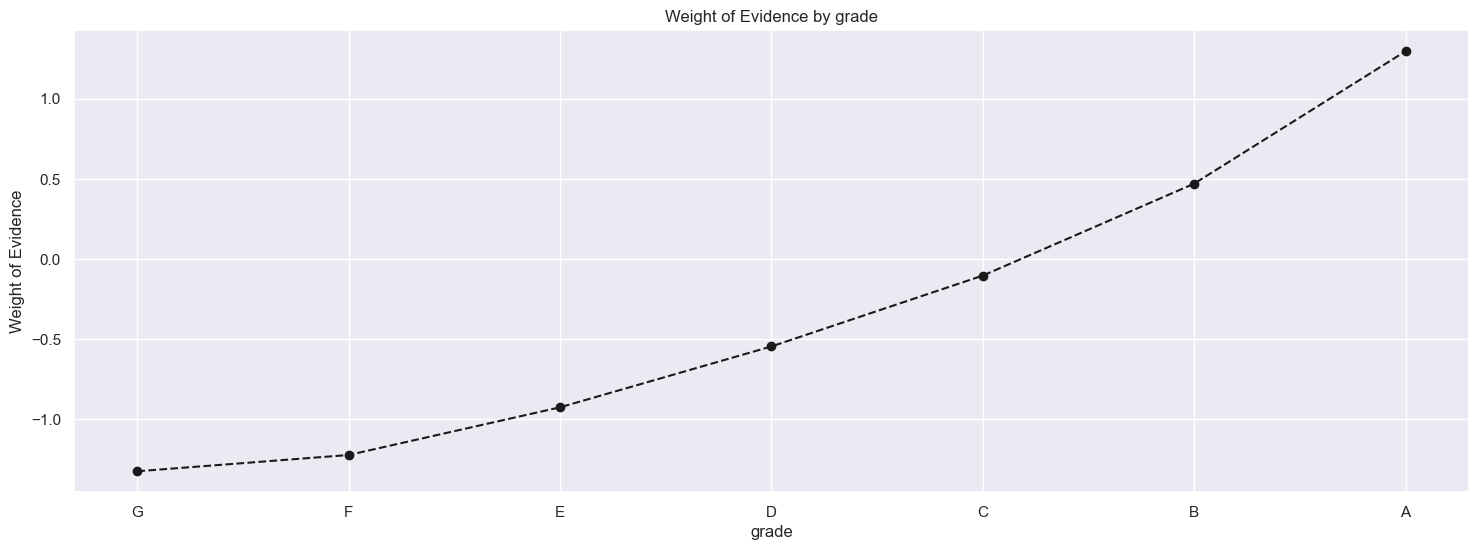

In [40]:
plot_by_woe(df_temp,0)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

In [41]:
# We make the WoE transformation from 'grade' to its WoE equivalent 'grade_woe'
woe_dict = dict(zip(df_temp['grade'], df_temp['WoE']))
df_inputs_prepr['grade_woe'] = df_inputs_prepr['grade'].map(woe_dict).fillna(-1)

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [43]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,home_ownership,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_bad,diff_WoE,IV
0,ANY,99,0.191919,0.000317,19.0,80.0,0.000305,0.000384,-0.230587,NaN,NaN,0.022053
1,RENT,123816,0.181576,0.396769,22482.0,101334.0,0.385965,0.454053,-0.162468,0.010343,0.068119,0.022053
2,NONE,6,0.166667,0.000019,1.0,5.0,0.000019,0.000020,-0.058737,0.014909,0.103731,0.022053
3,OTHER,24,0.166667,0.000077,4.0,20.0,0.000076,0.000081,-0.058737,0.000000,0.000000,0.022053
4,OWN,33728,0.162713,0.108081,5488.0,28240.0,0.107562,0.110837,-0.029999,0.003953,0.028738,0.022053
5,MORTGAGE,154388,0.139389,0.494737,21520.0,132868.0,0.506073,0.434625,0.152199,0.023324,0.182198,0.022053


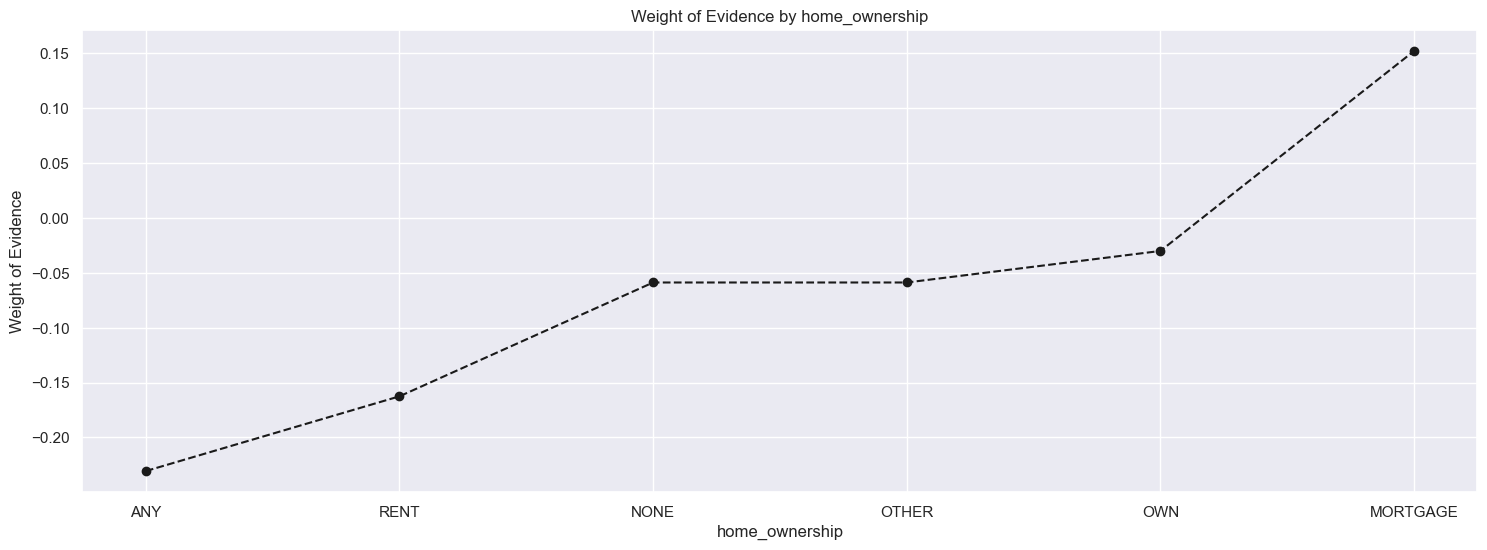

In [44]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [45]:
woe_dict = dict(zip(df_temp['home_ownership'], df_temp['WoE']))
df_inputs_prepr['home_ownership_woe'] = df_inputs_prepr['home_ownership'].map(woe_dict).fillna(-1)

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [47]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['ME', 'VA', 'CA', 'KY', 'NV', 'MO', 'SC', 'AZ', 'MN', 'NY', 'OH',
       'MA', 'HI', 'OK', 'IL', 'RI', 'GA', 'MT', 'IN', 'FL', 'WI', 'MD',
       'NC', 'TX', 'NM', 'CT', 'MI', 'UT', 'NJ', 'OR', 'TN', 'PA', 'KS',
       'VT', 'AL', 'DC', 'CO', 'AR', 'LA', 'NE', 'MS', 'DE', 'WA', 'AK',
       'WV', 'WY', 'NH', 'ND', 'SD', 'ID', 'IA'], dtype=object)

In [48]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,addr_state,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_bad,diff_WoE,IV
0,LA,3592,0.204065,0.011511,733.0,2859.0,0.010889,0.014804,-0.307093,NaN,NaN,inf
1,AL,3850,0.191429,0.012337,737.0,3113.0,0.011857,0.014885,-0.227420,0.012636,0.079673,inf
2,OK,2859,0.190626,0.009162,545.0,2314.0,0.008814,0.011007,-0.222228,0.000802,0.005193,inf
3,MS,1652,0.190073,0.005294,314.0,1338.0,0.005096,0.006342,-0.218636,0.000553,0.003591,inf
4,NM,1566,0.189017,0.005018,296.0,1270.0,0.004837,0.005978,-0.211762,0.001056,0.006874,inf
5,AR,2391,0.185278,0.007662,443.0,1948.0,0.007420,0.008947,-0.187186,0.003738,0.024576,inf
6,NE,965,0.175130,0.003092,169.0,796.0,0.003032,0.003413,-0.118474,0.010149,0.068712,inf
7,NV,4421,0.174621,0.014167,772.0,3649.0,0.013898,0.015592,-0.114951,0.000508,0.003523,inf
8,FL,22158,0.174294,0.071005,3862.0,18296.0,0.069687,0.077998,-0.112677,0.000327,0.002273,inf
9,IN,5063,0.172625,0.016224,874.0,4189.0,0.015955,0.017652,-0.101038,0.001669,0.011640,inf


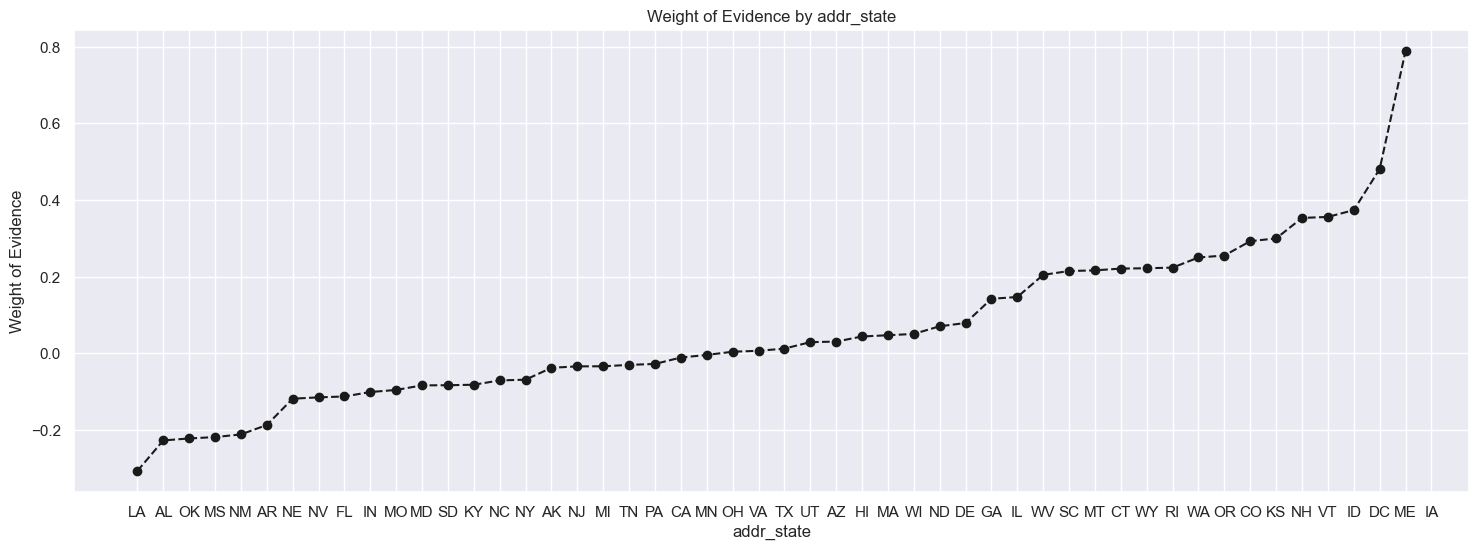

In [49]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [50]:
woe_dict = dict(zip(df_temp['addr_state'], df_temp['WoE']))
df_inputs_prepr['addr_state_woe'] = df_inputs_prepr['addr_state'].map(woe_dict).fillna(-1)

### Preprocessing Discrete Variables: 

In [52]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_bad,diff_WoE,IV
0,Verified,94041,0.195074,0.301355,18345.0,75696.0,0.288314,0.370501,-0.250806,NaN,NaN,0.059651
1,Source Verified,121909,0.165254,0.390658,20146.0,101763.0,0.387599,0.406875,-0.048534,0.029820,0.202273,0.059651
2,Not Verified,96111,0.114690,0.307988,11023.0,85088.0,0.324087,0.222624,0.375527,0.050564,0.424061,0.059651


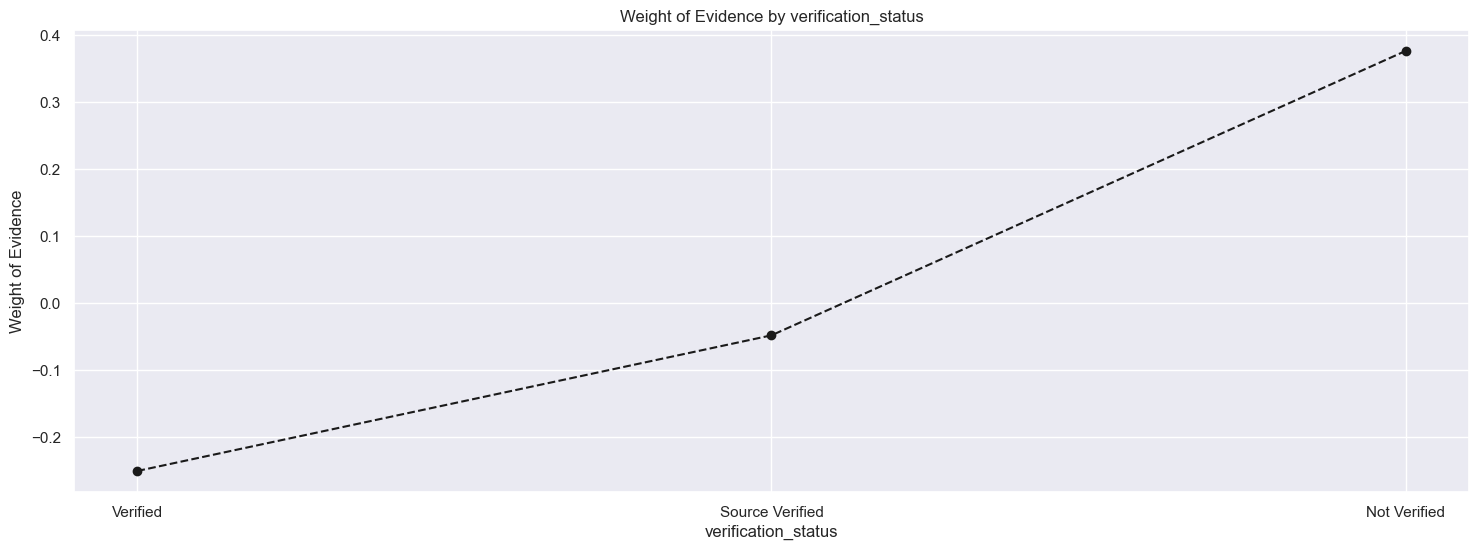

In [53]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [54]:
woe_dict = dict(zip(df_temp['verification_status'], df_temp['WoE']))
df_inputs_prepr['verification_status_woe'] = df_inputs_prepr['verification_status'].map(woe_dict).fillna(-1)

In [55]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_bad,diff_WoE,IV
0,educational,72,0.222222,0.000231,16.0,56.0,0.000213,0.000323,-0.415412,NaN,NaN,0.017325
1,small_business,3444,0.221545,0.011036,763.0,2681.0,0.010212,0.015410,-0.411488,0.000678,0.003924,0.017325
2,renewable_energy,189,0.216931,0.000606,41.0,148.0,0.000564,0.000828,-0.384534,0.004613,0.026953,0.017325
3,moving,2139,0.183731,0.006854,393.0,1746.0,0.006650,0.007937,-0.176902,0.033201,0.207633,0.017325
4,house,1574,0.172808,0.005044,272.0,1302.0,0.004959,0.005493,-0.102320,0.010923,0.074582,0.017325
5,debt_consolidation,180029,0.170034,0.576903,30611.0,149418.0,0.569110,0.618229,-0.082786,0.002774,0.019534,0.017325
6,other,18347,0.159427,0.058793,2925.0,15422.0,0.058740,0.059074,-0.005674,0.010607,0.077112,0.017325
7,medical,3647,0.151083,0.011687,551.0,3096.0,0.011792,0.011128,0.057957,0.008344,0.063631,0.017325
8,vacation,2129,0.142790,0.006822,304.0,1825.0,0.006951,0.006140,0.124133,0.008293,0.066176,0.017325
9,major_purchase,6726,0.141392,0.021553,951.0,5775.0,0.021996,0.019207,0.135605,0.001398,0.011472,0.017325


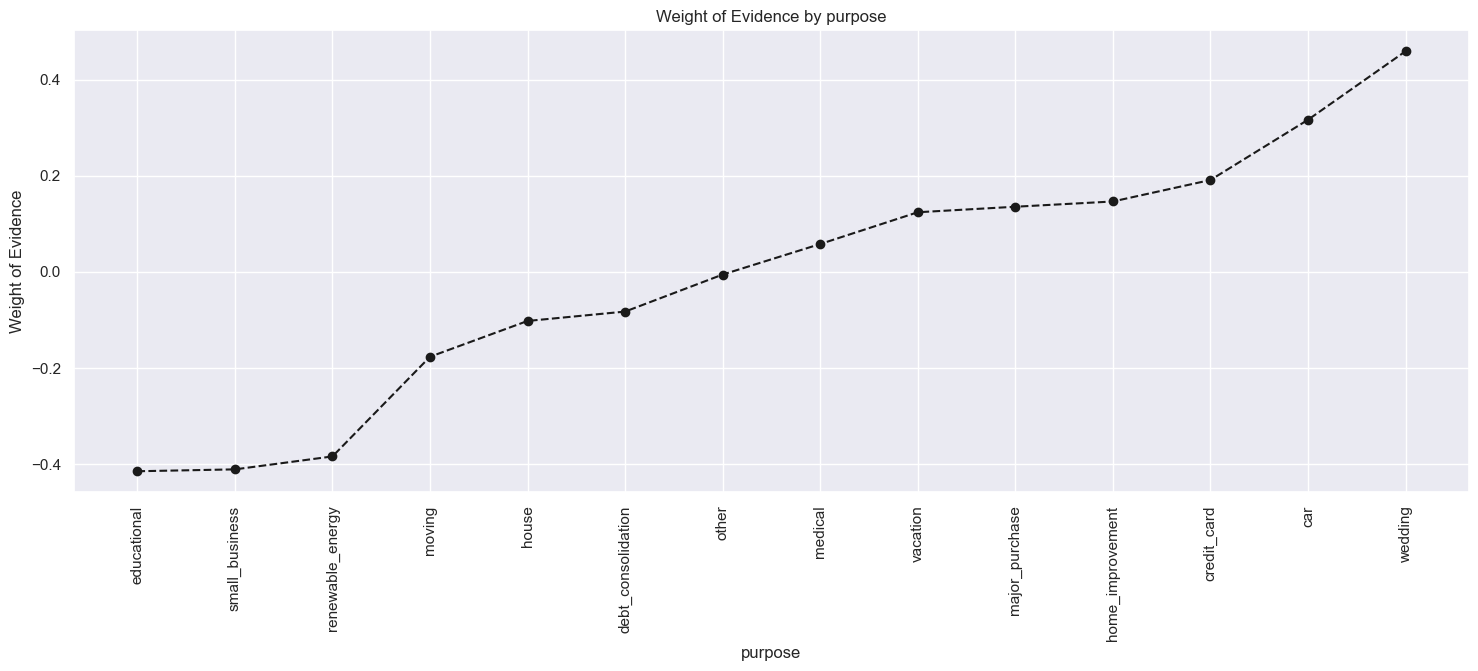

In [56]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [57]:
woe_dict = dict(zip(df_temp['purpose'], df_temp['WoE']))
df_inputs_prepr['purpose_woe'] = df_inputs_prepr['purpose'].map(woe_dict).fillna(-1)

In [58]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_bad,diff_WoE,IV
0,f,115816,0.172558,0.371133,19985.0,95831.0,0.365005,0.403623,-0.100570,NaN,NaN,0.006307
1,w,196245,0.150470,0.628867,29529.0,166716.0,0.634995,0.596377,0.062744,0.022088,0.163315,0.006307


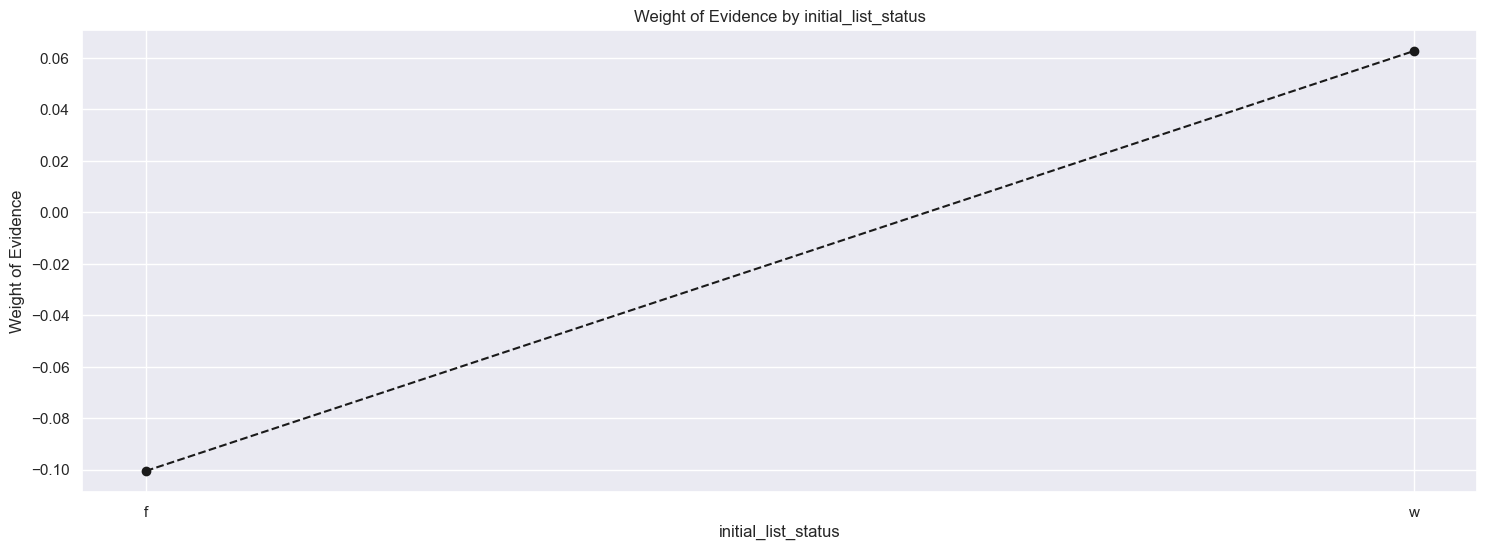

In [59]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [60]:
woe_dict = dict(zip(df_temp['initial_list_status'], df_temp['WoE']))
df_inputs_prepr['initial_list_status_woe'] = df_inputs_prepr['initial_list_status'].map(woe_dict).fillna(-1)

In [61]:
from sklearn.preprocessing import MinMaxScaler
# Select columns that end with 'woe'
woe_columns = [col for col in df_inputs_prepr.columns if col.endswith('woe')]

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Loop through each column in the woe_columns list
for col in woe_columns:
    # Replace positive infinity with the maximum finite value in the column
    df_inputs_prepr[col] = df_inputs_prepr[col].replace(np.inf, df_inputs_prepr[col][df_inputs_prepr[col] != np.inf].max())
    
    # Replace negative infinity with the minimum finite value in the column
    df_inputs_prepr[col] = df_inputs_prepr[col].replace(-np.inf, df_inputs_prepr[col][df_inputs_prepr[col] != -np.inf].min())
    
    # Optionally, fill NaN values with 0 or another strategy
    df_inputs_prepr[col] = df_inputs_prepr[col].fillna(0)


# Apply the scaler to the selected columns
df_inputs_prepr[woe_columns] = scaler.fit_transform(df_inputs_prepr[woe_columns])

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [63]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE']) we want the natural order so we won't be doing sorting
    #df = df.reset_index(drop = True)
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [64]:
catf, numf = cat_num_features(loan_data)

# Initialize the MinMaxScaler to scale numerical features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the numerical columns, create new columns with "_scaled" suffix
scaled_columns = pd.DataFrame(scaler.fit_transform(df_inputs_prepr[numf]), 
                              columns=[col + '_scaled' for col in numf],
                              index=df_inputs_prepr.index)  # Conserver le même index que df_inputs_prepr

# Concatenate the original DataFrame with the scaled columns
df_inputs_prepr = pd.concat([df_inputs_prepr, scaled_columns], axis=1)


In [65]:
df_inputs_prepr.info(max_cols = 500)

<class 'pandas.core.frame.DataFrame'>
Index: 312061 entries, 99617 to 121958
Data columns (total 197 columns):
 #    Column                                 Non-Null Count   Dtype         
---   ------                                 --------------   -----         
 0    id                                     312061 non-null  int64         
 1    loan_amnt                              312061 non-null  float64       
 2    funded_amnt                            312061 non-null  float64       
 3    funded_amnt_inv                        312061 non-null  float64       
 4    term                                   312061 non-null  object        
 5    int_rate                               312061 non-null  float64       
 6    installment                            312061 non-null  float64       
 7    grade                                  312061 non-null  object        
 8    sub_grade                              312061 non-null  object        
 9    emp_length                          

In [66]:
pd.set_option('display.max_columns', None)
df_inputs_prepr.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade_woe,home_ownership_woe,addr_state_woe,verification_status_woe,purpose_woe,initial_list_status_woe,loan_amnt_scaled,funded_amnt_scaled,funded_amnt_inv_scaled,int_rate_scaled,installment_scaled,annual_inc_scaled,dti_scaled,delinq_2yrs_scaled,fico_range_low_scaled,fico_range_high_scaled,inq_last_6mths_scaled,mths_since_last_delinq_scaled,mths_since_last_record_scaled,open_acc_scaled,pub_rec_scaled,revol_bal_scaled,revol_util_scaled,total_acc_scaled,out_prncp_scaled,out_prncp_inv_scaled,total_pymnt_scaled,total_pymnt_inv_scaled,total_rec_prncp_scaled,total_rec_int_scaled,total_rec_late_fee_scaled,recoveries_scaled,collection_recovery_fee_scaled,last_pymnt_amnt_scaled,last_fico_range_high_scaled,last_fico_range_low_scaled,tot_coll_amt_scaled,tot_cur_bal_scaled,open_acc_6m_scaled,open_act_il_scaled,open_il_12m_scaled,open_il_24m_scaled,mths_since_rcnt_il_scaled,total_bal_il_scaled,il_util_scaled,open_rv_12m_scaled,open_rv_24m_scaled,max_bal_bc_scaled,all_util_scaled,total_rev_hi_lim_scaled,inq_fi_scaled,total_cu_tl_scaled,inq_last_12m_scaled,acc_open_past_24mths_scaled,avg_cur_bal_scaled,bc_open_to_buy_scaled,bc_util_scaled,chargeoff_within_12_mths_scaled,delinq_amnt_scaled,mo_sin_old_il_acct_scaled,mo_sin_old_rev_tl_op_scaled,mo_sin_rcnt_rev_tl_op_scaled,mo_sin_rcnt_tl_scaled,mort_acc_scaled,mths_since_recent_bc_scaled,mths_since_recent_bc_dlq_scaled,mths_since_recent_inq_scaled,mths_since_recent_revol_delinq_scaled,num_accts_ever_120_pd_scaled,num_actv_bc_tl_scaled,num_actv_rev_tl_scaled,num_bc_sats_scaled,num_bc_tl_scaled,num_il_tl_scaled,num_op_rev_tl_scaled,num_rev_accts_scaled,num_rev_tl_bal_gt_0_scaled,num_sats_scaled,num_tl_120dpd_2m_scaled,num_tl_30dpd_scaled,num_tl_90g_dpd_24m_scaled,num_tl_op_past_12m_scaled,pct_tl_nvr_dlq_scaled,percent_bc_gt_75_scaled,pub_rec_bankruptcies_scaled,tax_liens_scaled,tot_hi_cred_lim_scaled,total_bal_ex_mort_scaled,total_bc_limit_scaled,total_il_high_credit_limit_scaled,emp_length_int_scaled,mths_since_earliest_cr_line_scaled,term_int_scaled,mths_since_issue_d_scaled
99617,110773804,4650.0,4650.0,4650.00,36 months,9.44,148.83,B,B1,0,RENT,13209.0,Verified,Jun-2017,Fully Paid,credit_card,ME,13.00,0.0,May-1995,745.0,749.0,0.0,0.0,0.0,4.0,0.0,5648.0,53.3,12.0,w,0.00,0.00,5187.761169,5187.76,4650.00,537.76,0.00,0.0,0.0,2513.70,739.0,735.0,0.0,5648.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3803.0,53.0,10600.0,0.0,0.0,1.0,2.0,1412.0,2152.0,72.4,0.0,0.0,0.0,265.0,9.0,9.0,1.0,9.0,0.0,9.0,0.0,0.0,2.0,2.0,2.0,7.0,0.0,4.0,11.0

### Preprocessing the Test Dataset

In [68]:
#####
loan_data_inputs_train = df_inputs_prepr
##### save the data


In [69]:
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test


In [70]:
discrete_columns = ['grade', 'home_ownership','addr_state','verification_status', 'purpose', 'initial_list_status']

for col in discrete_columns:
    df_temp = woe_discrete(df_inputs_prepr, col, df_targets_prepr)
    woe_dict = dict(zip(df_temp[col], df_temp['WoE']))
    df_inputs_prepr[col + '_woe'] = df_inputs_prepr[col].map(woe_dict).fillna(-1)

from sklearn.preprocessing import MinMaxScaler
# Select columns that end with 'woe'
woe_columns = [col for col in df_inputs_prepr.columns if col.endswith('woe')]

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Loop through each column in the woe_columns list
for col in woe_columns:
    # Replace positive infinity with the maximum finite value in the column
    df_inputs_prepr[col] = df_inputs_prepr[col].replace(np.inf, df_inputs_prepr[col][df_inputs_prepr[col] != np.inf].max())
    
    # Replace negative infinity with the minimum finite value in the column
    df_inputs_prepr[col] = df_inputs_prepr[col].replace(-np.inf, df_inputs_prepr[col][df_inputs_prepr[col] != -np.inf].min())
    
    # Optionally, fill NaN values with 0 or another strategy
    df_inputs_prepr[col] = df_inputs_prepr[col].fillna(0)


# Apply the scaler to the selected columns
df_inputs_prepr[woe_columns] = scaler.fit_transform(df_inputs_prepr[woe_columns])


In [71]:
catf, numf = cat_num_features(loan_data)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the numerical columns, create new columns with "_scaled" suffix
scaled_columns = pd.DataFrame(scaler.fit_transform(df_inputs_prepr[numf]), 
                              columns=[col + '_scaled' for col in numf],
                              index=df_inputs_prepr.index)

# Concatenate the original DataFrame with the scaled columns
df_inputs_prepr = pd.concat([df_inputs_prepr, scaled_columns], axis=1)

In [72]:
loan_data_inputs_test = df_inputs_prepr

In [73]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')